# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [60]:
data_classes= ['variety_A','variety_B','variety_C']

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,2
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,1
102,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438,1
143,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550,2
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,1
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,0
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,0
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,1
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,0


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [ ]:
# Your code to evaluate data, and train and evaluate a classification model

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [ ]:
# Your code to predict classes for the two new samples

In [3]:
data.shape

(178, 14)

## Check for Missing Data

In [4]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

No missing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

All seems to be in order, but lets 
## check for possible categorical columns

In [7]:
data.nunique()

Alcohol                       126
Malic_acid                    133
Ash                            79
Alcalinity                     63
Magnesium                      53
Phenols                        97
Flavanoids                    132
Nonflavanoids                  39
Proanthocyanins               101
Color_intensity               132
Hue                            78
OD280_315_of_diluted_wines    122
Proline                       121
WineVariety                     3
dtype: int64

WineVariety is a categorical variable which is the label having 3 distinct values.

## Clean outliers

In [14]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth= 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()


Alcohol 
Minimum:11.03
Mean:13.00
Median:13.05
Mode:12.37
Maximum:14.83



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Malic_acid 
Minimum:0.74
Mean:2.34
Median:1.87
Mode:1.73
Maximum:5.80



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Ash 
Minimum:1.36
Mean:2.37
Median:2.36
Mode:2.28
Maximum:3.23



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Alcalinity 
Minimum:10.60
Mean:19.49
Median:19.50
Mode:20.00
Maximum:30.00

Magnesium 
Minimum:70.00
Mean:99.74
Median:98.00
Mode:88.00
Maximum:162.00



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Phenols 
Minimum:0.98
Mean:2.30
Median:2.35
Mode:2.20
Maximum:3.88

Flavanoids 
Minimum:0.34
Mean:2.03
Median:2.13
Mode:2.65
Maximum:5.08



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Nonflavanoids 
Minimum:0.13
Mean:0.36
Median:0.34
Mode:0.26
Maximum:0.66



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Proanthocyanins 
Minimum:0.41
Mean:1.59
Median:1.56
Mode:1.35
Maximum:3.58



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Color_intensity 
Minimum:1.28
Mean:5.06
Median:4.69
Mode:2.60
Maximum:13.00



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Hue 
Minimum:0.48
Mean:0.96
Median:0.96
Mode:1.04
Maximum:1.71



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


OD280_315_of_diluted_wines 
Minimum:1.27
Mean:2.61
Median:2.78
Mode:2.87
Maximum:4.00



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Proline 
Minimum:278.00
Mean:746.89
Median:673.50
Mode:520.00
Maximum:1680.00



C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


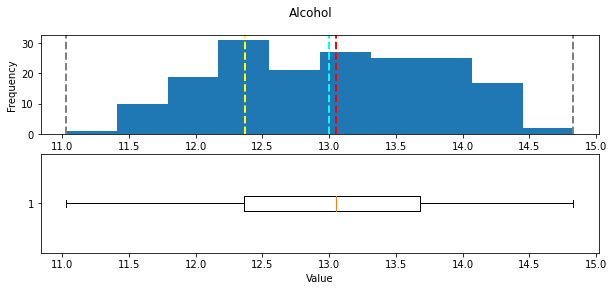

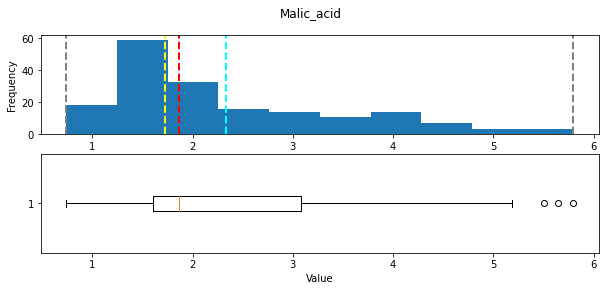

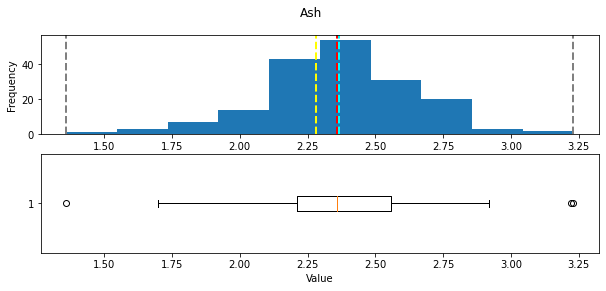

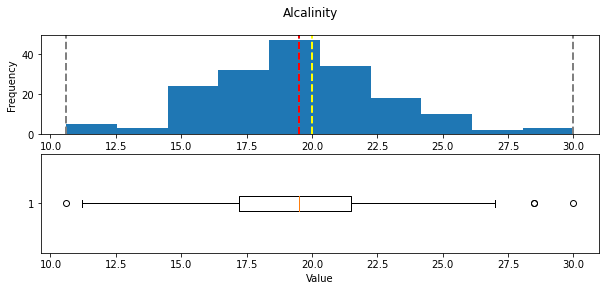

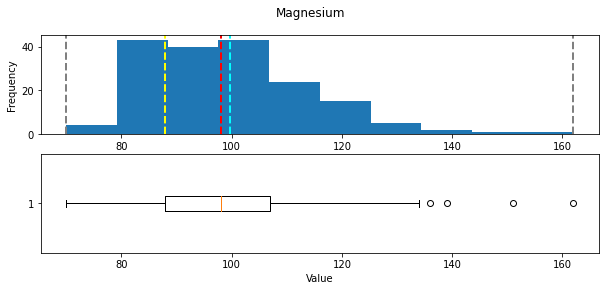

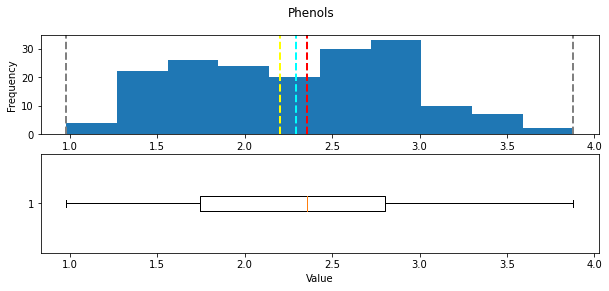

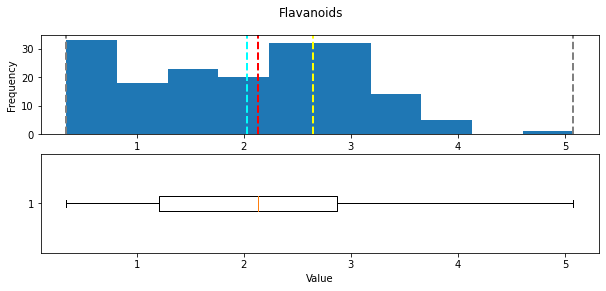

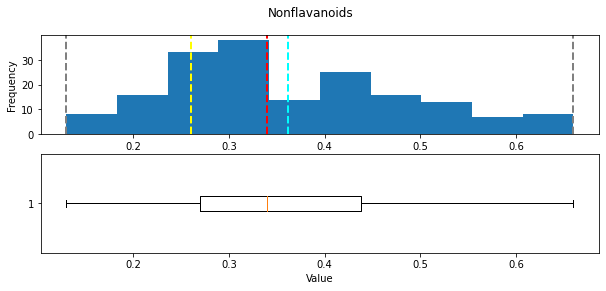

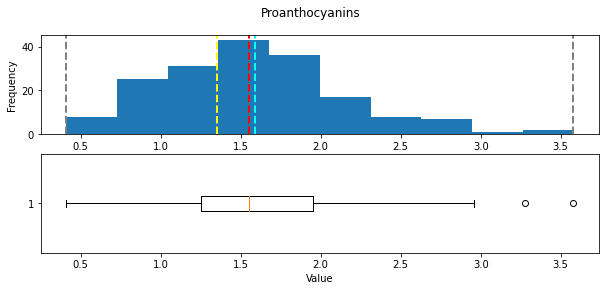

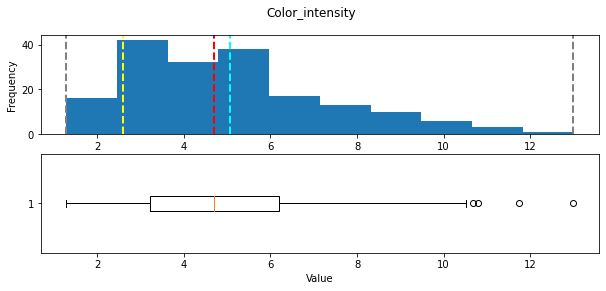

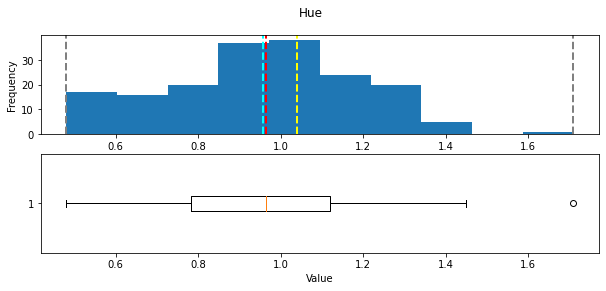

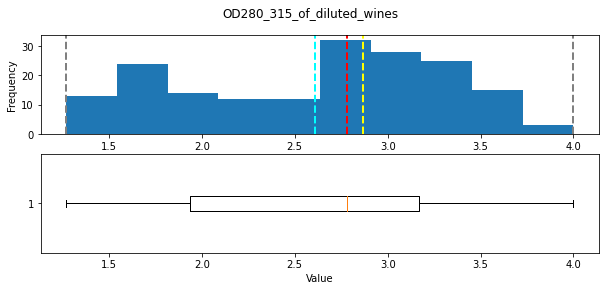

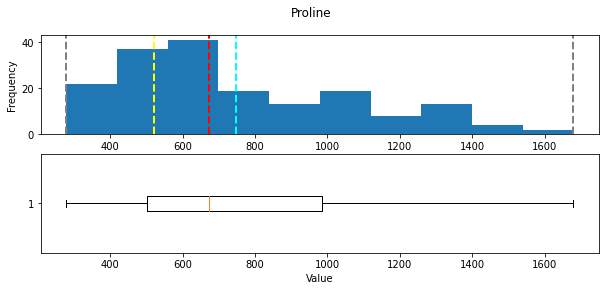

In [15]:
for col in list(data.columns[:-1]):
    show_distribution(data[col])

The few outlier points in Hue, Color_Intensity, proanthocyianians, magnesium, alcalinity, ash and malic_acid are very few.

## Check for variance

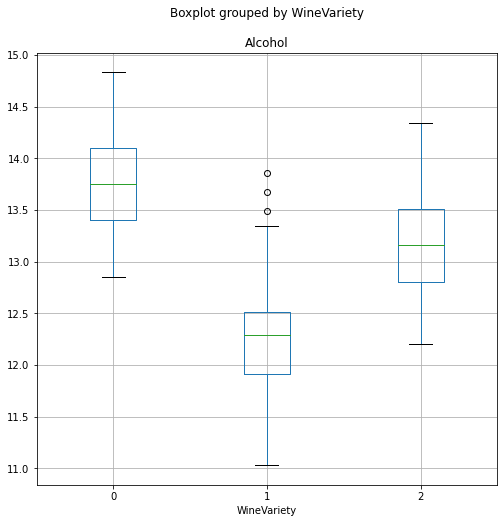

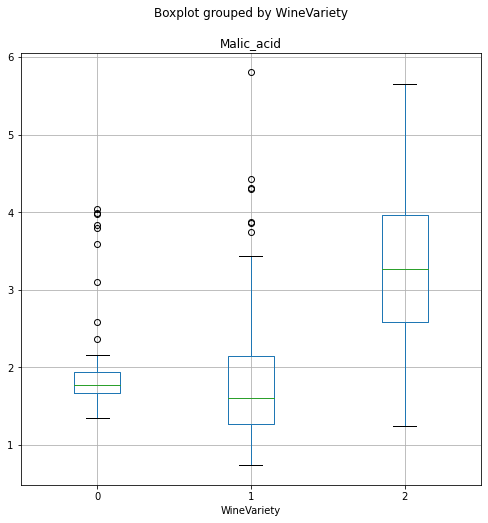

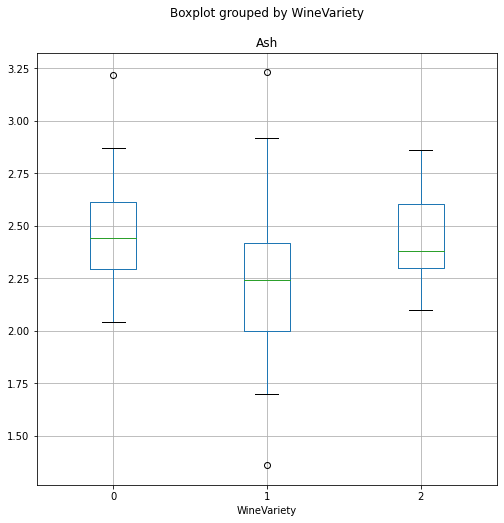

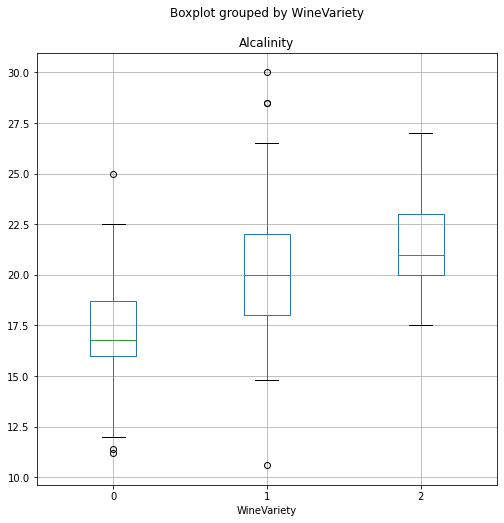

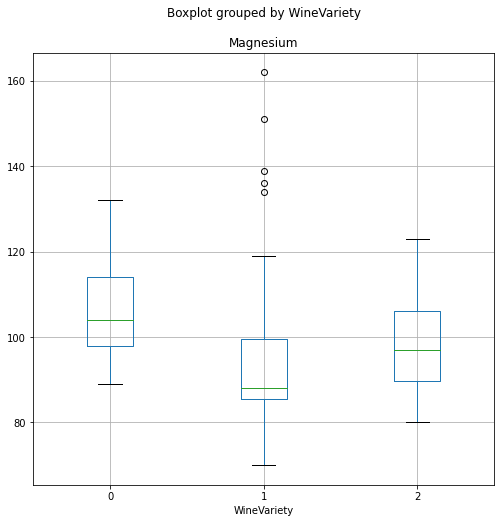

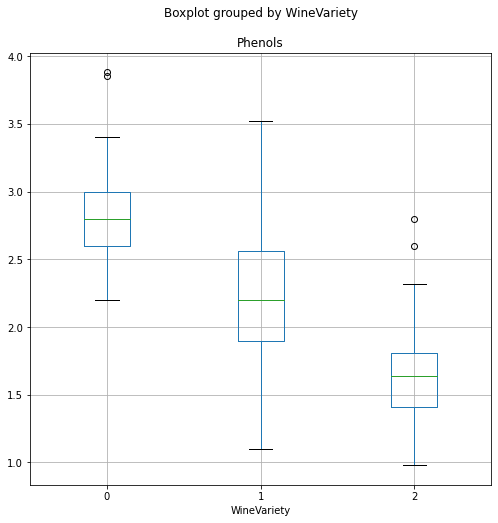

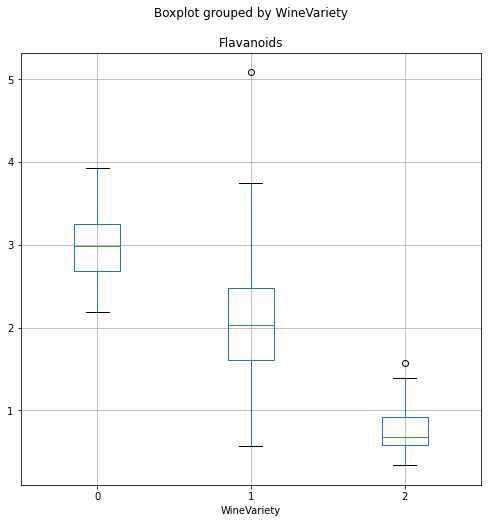

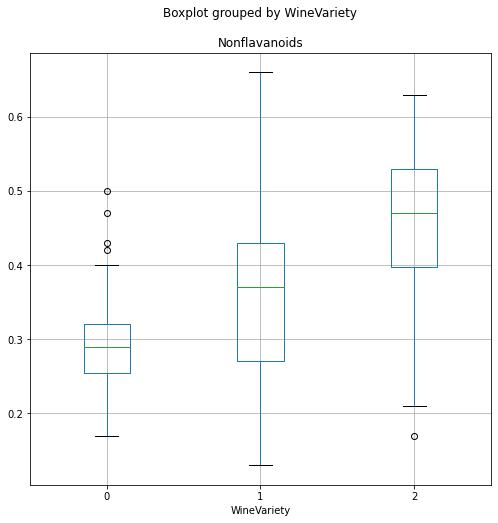

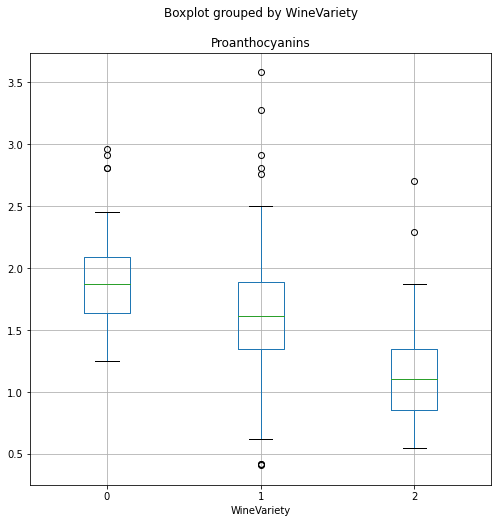

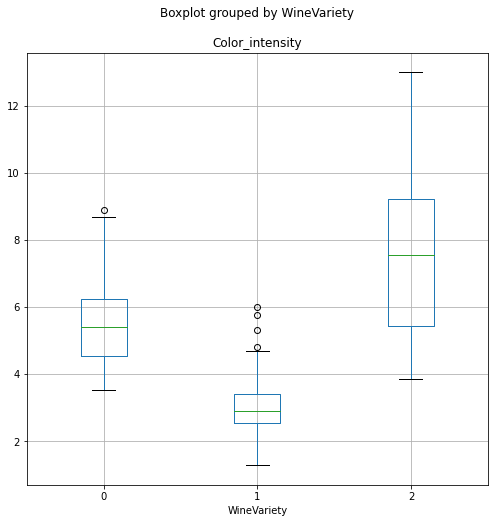

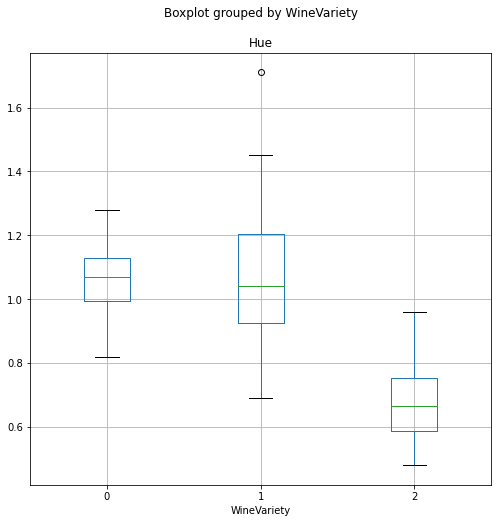

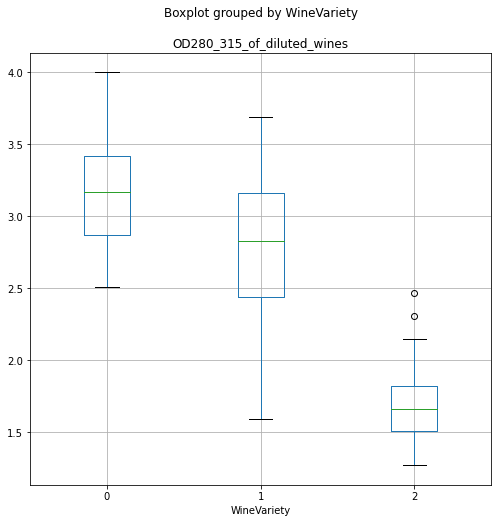

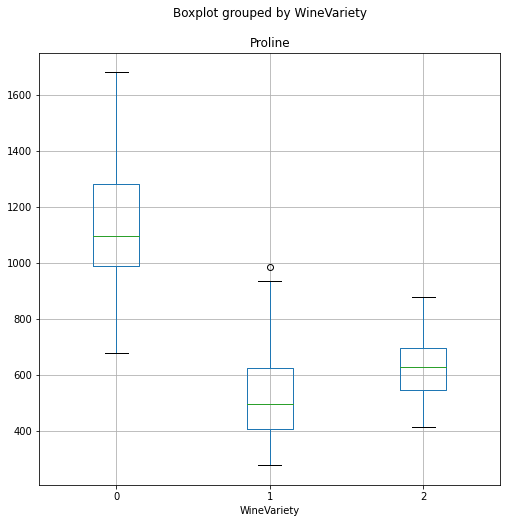

In [19]:
for col in list(data.columns[:-1]):
    data.boxplot(column=col, by='WineVariety', figsize=(8,8))

In [21]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety'],
      dtype='object')

Phenols, Flavanoids and OD280_315_of_diluted_wines seems to be more correlated and clear demacations for the 3 WineVariety.

Several features has different variance for the 3 wineVariety.

In [26]:
data[['Phenols','Flavanoids','Nonflavanoids','OD280_315_of_diluted_wines']].corr()

,Phenols,Flavanoids,Nonflavanoids,OD280_315_of_diluted_wines
Phenols,1.000000,0.864564,-0.449935,0.699949
Flavanoids,0.864564,1.000000,-0.537900,0.787194
Nonflavanoids,-0.449935,-0.537900,1.000000,-0.503270
OD280_315_of_diluted_wines,0.699949,0.787194,-0.503270,1.000000


'Phenols','Flavanoids' and'OD280_315_of_diluted_wines' have similar profile and are inversily correlated with NonFlavanoids, this distinction will help us to predict wineVariety.

<AxesSubplot:>

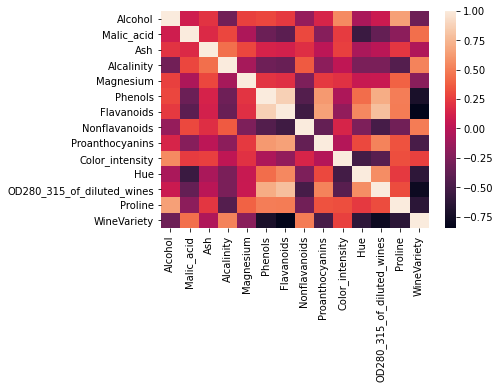

In [24]:
import seaborn as sns

sns.heatmap(data.corr())

In [28]:
list(data.columns)

['Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280_315_of_diluted_wines',
 'Proline',
 'WineVariety']

In [29]:
data_features= list(data.columns[:-1])
data_label = 'WineVariety'

## Prepare the data

In [31]:
data.shape

(178, 14)

In [32]:
from sklearn.model_selection import train_test_split

# Separate features and labels
data_X,data_y= data[data_features].values,data[data_label].values

# Split data 70%-30% into training set and test set
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(data_X,data_y
                                                                        ,test_size=0.30
                                                                        ,random_state=0
                                                                        ,stratify=data_y)

print('Training Set:%d, Test Set: %d \n'% (x_data_train.shape[0],x_data_test.shape[0]))

Training Set:124, Test Set: 54 



## Compare Numeric Variables.

In [38]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Mean Alcohol is 13.05 while that of Malic acid is 1.8, These values need to be rescaled.

In [44]:
#data.plot(X='WineVariety',y=list(data.columns[:-1]), kind='bar', figsize=(8,5))

### Preprocess data in a pipeline

In [55]:
list(range(0,data.shape[1]-1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # Support vector machine
# Define preprocessing for numeric columns (scale them)
feature_columns = list(range(0,data.shape[1]-1))
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])
# Create preprocessing steps
preprocessor = ColumnTransformer(
transformers=[
('preprocess', feature_transformer, feature_columns)])
# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
('regressor', SVC(probability=True))])
# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_data_train, y_data_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('regressor', SVC(probability=True))])


Now we can evaluate the new model

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [58]:
# Get predictions from test data
data_predictions = multi_model.predict(x_data_test)
data_prob = multi_model.predict_proba(x_data_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_data_test, data_predictions))
print("Overall Precision:",precision_score(y_data_test, data_predictions,average='macro'))
print("Overall Recall:",recall_score(y_data_test, data_predictions,average='macro'))
print('Average AUC:', roc_auc_score(y_data_test,data_prob,multi_class='ovr'))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


In [59]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Print the confusion matrix
mcm = confusion_matrix(y_data_test, data_predictions)
print(mcm)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


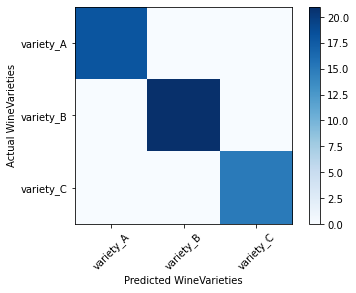

In [61]:

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(data_classes))
plt.xticks(tick_marks, data_classes, rotation=45)
plt.yticks(tick_marks, data_classes)
plt.xlabel("Predicted WineVarieties")
plt.ylabel("Actual WineVarieties")
plt.show()

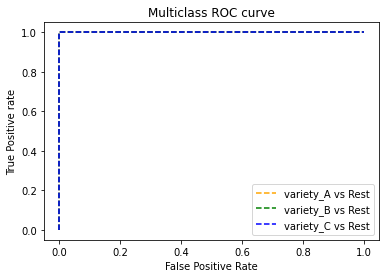

In [62]:
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh = {}
for i in range(len(data_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_data_test, data_prob[:,i],pos_label= i)
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',
label=data_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=data_classes[1]
+ ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=data_classes[2]
+ ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Save the Model

In [63]:
import joblib

# Save the model as a pickle file
filename = './data_model.pkl'
joblib.dump(multi_model,filename)

['./data_model.pkl']

OK, so now we have a trained model. Let’s use it to predict the class of a new wine observation:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]

In [64]:
# Load the model from the file
multi_model = joblib.load(filename)

# This time our input is an array of two feature arrays
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print ('New samples:\n{}'.format(x_new))
# Call the web service, passing the input data
predictions = multi_model.predict(x_new)
# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + data_classes[prediction] +')')

New samples:
[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
0 (variety_A)
1 (variety_B)
